In [280]:
import pandas as pd
from path import Path
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [281]:
data_path = "Levels_Fyi_Salary_data.csv"
df = pd.read_csv(data_path)
print(df.shape)
df.head()

(62642, 29)


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [282]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [283]:
df1 = df[df["title"] == "Data Scientist"]
filtered_columns = ["title", "company", "location", "yearsofexperience", "totalyearlycompensation",
                    "gender", "Doctorate_Degree", "Masters_Degree", "Bachelors_Degree", "tag"]
df2 = df1[filtered_columns]
print(df1.shape)
df2

(2578, 29)


,title,company,location,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag
419,Data Scientist,LinkedIn,"San Francisco, CA",4.0,233000,Male,0,0,0,Data Analysis
440,Data Scientist,Microsoft,"Seattle, WA",11.0,218000,Male,0,0,0,ML / AI
444,Data Scientist,ebay,"San Jose, CA",10.0,180000,Female,0,0,0,NaN
454,Data Scientist,Twitter,"San Francisco, CA",4.0,500000,Male,0,0,0,ML / AI
495,Data Scientist,Facebook,"Seattle, WA",8.0,370000,Male,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
62240,Data Scientist,IBM,"Washington, DC",5.0,155000,Male,0,0,0,ML / AI
62283,Data Scientist,Facebook,"Singapore, SG, Singapore",0.0,150000,Female,0,0,0,ML / AI
62285,Data Scientist,ADP,"Roseland, NJ",8.0,185000,Male,0,0,0,UX Research
62529,Data Scientist,Google,"Kirkland, WA",22.0,685000,Male,0,0,0,ML / AI


In [284]:
print(df1["tag"].value_counts().head(50))

ML / AI                           984
Data                              287
General                           258
Analytics                          94
Data Science                       52
Machine Learning                   51
ML                                 43
ML/AI                              37
Full Stack                         35
Product                            20
Data Scientist                     17
Security                           17
AI/ML                              16
iOS                                16
Data science                       15
Distributed Systems (Back-End)     14
DS                                 14
Product Analytics                  13
data science                       12
NLP                                11
AI                                 10
Data Engineering                   10
data                               10
Data Engineer                       8
machine learning                    8
Machine learning                    8
general     

In [285]:
form_state_one = r'(\w+\s)*(\w+),\s([A-Z]{2})$'
matches_form_one = df2.location.str.contains(form_state_one, flags=re.IGNORECASE, na=False)
no_form_one = df2.location.str.contains(form_state_one, flags=re.IGNORECASE, na=False).sum()
print(no_form_one)

form_state_two = r'(\w+\s)*(\w+),\s([A-Z]{2}),\s(\w+)'
matches_form_two = df2.location.str.contains(form_state_two, flags=re.IGNORECASE, na=False)
no_form_two = df2.location.str.contains(form_state_two, flags=re.IGNORECASE, na=False).sum()
print(no_form_two)


df2.location[~matches_form_one & ~matches_form_two]

2226
351


C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


9061    Tel Aviv, Israel
Name: location, dtype: object

In [286]:
def US_location_to_state(city):
    # if input is of the form $###,###,###
    if re.match(form_state_one, city, flags=re.IGNORECASE):

        # remove city name and commas
        state = re.sub('(\w+\s)*(\w+),\s','', city)
        
        # return state
        return state
    # otherwise, return NaN
    else:
        return np.nan
    

def location_to_city(city):
    # if input is of the form $###,###,###
    if re.match(form_state_one, city, flags=re.IGNORECASE):

        # remove city name and commas
        city = re.sub(',\s([A-Z]{2})$','', city)
        
        # return state
        return city
    # otherwise, return NaN
    else:
        return np.nan

In [287]:
df3 = df2.loc[df2.location != "Tel Aviv, Israel"]
df3

,title,company,location,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag
419,Data Scientist,LinkedIn,"San Francisco, CA",4.0,233000,Male,0,0,0,Data Analysis
440,Data Scientist,Microsoft,"Seattle, WA",11.0,218000,Male,0,0,0,ML / AI
444,Data Scientist,ebay,"San Jose, CA",10.0,180000,Female,0,0,0,NaN
454,Data Scientist,Twitter,"San Francisco, CA",4.0,500000,Male,0,0,0,ML / AI
495,Data Scientist,Facebook,"Seattle, WA",8.0,370000,Male,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
62240,Data Scientist,IBM,"Washington, DC",5.0,155000,Male,0,0,0,ML / AI
62283,Data Scientist,Facebook,"Singapore, SG, Singapore",0.0,150000,Female,0,0,0,ML / AI
62285,Data Scientist,ADP,"Roseland, NJ",8.0,185000,Male,0,0,0,UX Research
62529,Data Scientist,Google,"Kirkland, WA",22.0,685000,Male,0,0,0,ML / AI


In [288]:
df3['state'] = df3.location.str.extract(f'({form_state_one}|{form_state_two})', flags=re.IGNORECASE)[0].apply(US_location_to_state)
print(df2.shape)
df3

(2578, 10)


C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,company,location,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state
419,Data Scientist,LinkedIn,"San Francisco, CA",4.0,233000,Male,0,0,0,Data Analysis,CA
440,Data Scientist,Microsoft,"Seattle, WA",11.0,218000,Male,0,0,0,ML / AI,WA
444,Data Scientist,ebay,"San Jose, CA",10.0,180000,Female,0,0,0,NaN,CA
454,Data Scientist,Twitter,"San Francisco, CA",4.0,500000,Male,0,0,0,ML / AI,CA
495,Data Scientist,Facebook,"Seattle, WA",8.0,370000,Male,0,0,0,NaN,WA
...,...,...,...,...,...,...,...,...,...,...,...
62240,Data Scientist,IBM,"Washington, DC",5.0,155000,Male,0,0,0,ML / AI,DC
62283,Data Scientist,Facebook,"Singapore, SG, Singapore",0.0,150000,Female,0,0,0,ML / AI,NaN
62285,Data Scientist,ADP,"Roseland, NJ",8.0,185000,Male,0,0,0,UX Research,NJ
62529,Data Scientist,Google,"Kirkland, WA",22.0,685000,Male,0,0,0,ML / AI,WA


In [289]:
df3 = df3[df3["state"].notna()]
df3

,title,company,location,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state
419,Data Scientist,LinkedIn,"San Francisco, CA",4.0,233000,Male,0,0,0,Data Analysis,CA
440,Data Scientist,Microsoft,"Seattle, WA",11.0,218000,Male,0,0,0,ML / AI,WA
444,Data Scientist,ebay,"San Jose, CA",10.0,180000,Female,0,0,0,NaN,CA
454,Data Scientist,Twitter,"San Francisco, CA",4.0,500000,Male,0,0,0,ML / AI,CA
495,Data Scientist,Facebook,"Seattle, WA",8.0,370000,Male,0,0,0,NaN,WA
...,...,...,...,...,...,...,...,...,...,...,...
62233,Data Scientist,Deloitte,"Chicago, IL",3.0,190000,Male,0,0,0,ML / AI,IL
62240,Data Scientist,IBM,"Washington, DC",5.0,155000,Male,0,0,0,ML / AI,DC
62285,Data Scientist,ADP,"Roseland, NJ",8.0,185000,Male,0,0,0,UX Research,NJ
62529,Data Scientist,Google,"Kirkland, WA",22.0,685000,Male,0,0,0,ML / AI,WA


In [290]:
df3['city'] = df3.location.str.extract(f'({form_state_one})', flags=re.IGNORECASE)[0].apply(location_to_city)
print(df3.shape)
df3

(2226, 12)


C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,company,location,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state,city
419,Data Scientist,LinkedIn,"San Francisco, CA",4.0,233000,Male,0,0,0,Data Analysis,CA,San Francisco
440,Data Scientist,Microsoft,"Seattle, WA",11.0,218000,Male,0,0,0,ML / AI,WA,Seattle
444,Data Scientist,ebay,"San Jose, CA",10.0,180000,Female,0,0,0,NaN,CA,San Jose
454,Data Scientist,Twitter,"San Francisco, CA",4.0,500000,Male,0,0,0,ML / AI,CA,San Francisco
495,Data Scientist,Facebook,"Seattle, WA",8.0,370000,Male,0,0,0,NaN,WA,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...
62233,Data Scientist,Deloitte,"Chicago, IL",3.0,190000,Male,0,0,0,ML / AI,IL,Chicago
62240,Data Scientist,IBM,"Washington, DC",5.0,155000,Male,0,0,0,ML / AI,DC,Washington
62285,Data Scientist,ADP,"Roseland, NJ",8.0,185000,Male,0,0,0,UX Research,NJ,Roseland
62529,Data Scientist,Google,"Kirkland, WA",22.0,685000,Male,0,0,0,ML / AI,WA,Kirkland


In [291]:
df3.drop('location', axis=1, inplace=True)
df3

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,title,company,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state,city
419,Data Scientist,LinkedIn,4.0,233000,Male,0,0,0,Data Analysis,CA,San Francisco
440,Data Scientist,Microsoft,11.0,218000,Male,0,0,0,ML / AI,WA,Seattle
444,Data Scientist,ebay,10.0,180000,Female,0,0,0,NaN,CA,San Jose
454,Data Scientist,Twitter,4.0,500000,Male,0,0,0,ML / AI,CA,San Francisco
495,Data Scientist,Facebook,8.0,370000,Male,0,0,0,NaN,WA,Seattle
...,...,...,...,...,...,...,...,...,...,...,...
62233,Data Scientist,Deloitte,3.0,190000,Male,0,0,0,ML / AI,IL,Chicago
62240,Data Scientist,IBM,5.0,155000,Male,0,0,0,ML / AI,DC,Washington
62285,Data Scientist,ADP,8.0,185000,Male,0,0,0,UX Research,NJ,Roseland
62529,Data Scientist,Google,22.0,685000,Male,0,0,0,ML / AI,WA,Kirkland


In [292]:
companies = df3.company.value_counts()
a = 0
for company in range(0,396):
    if companies[company] > 5:
        a = a+1
        
print(a)
companies

64


Amazon                    224
Microsoft                 202
Facebook                  175
Google                     83
Apple                      75
                         ... 
TripAdvisor                 1
Mitchell International      1
Oscar Health                1
Quest diagnostics           1
Illumina                    1
Name: company, Length: 397, dtype: int64

In [293]:
#Binning he companies- .cut with 4 bins...do we want to specifically design these?
bin_labels = ['Small', 'Medium', 'Large', 'Very Large']
bins4 = df3['company'].value_counts()
company_bins = pd.cut(bins4, bins=4, labels=bin_labels).to_list()#does this solve the issue of imbalanced data?
company_bins





#replace_company = list(companies[companies < 20].index)

# Replace in dataframe
#for co in replace_company:
#    df3.company = df3.company.replace(co,"Other")
    
# Check to make sure binning was successful
#df3.company.value_counts()


['Very Large',
 'Very Large',
 'Very Large',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 'Small',
 

In [294]:
#change company name to bin name
companies = []
for company in df3['company']:
    if company == "Amazon" or company == "Microsoft" or company == "Facebook":
        company = "Large"
    elif company == "Google" or company == "Apple" or company == "IBM" or company=="Uber":
        company = "Medium"
    else:
        company = "Small"
    companies.append(company)

In [295]:
#reassign company column to bin name
df3['company'] = companies
df3.head(10)
# clean_bins_df['gender'].value_counts()

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,company,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state,city
419,Data Scientist,Small,4.0,233000,Male,0,0,0,Data Analysis,CA,San Francisco
440,Data Scientist,Large,11.0,218000,Male,0,0,0,ML / AI,WA,Seattle
444,Data Scientist,Small,10.0,180000,Female,0,0,0,NaN,CA,San Jose
454,Data Scientist,Small,4.0,500000,Male,0,0,0,ML / AI,CA,San Francisco
495,Data Scientist,Large,8.0,370000,Male,0,0,0,NaN,WA,Seattle
499,Data Scientist,Large,3.0,200000,Male,0,0,0,ML / AI,WA,Seattle
509,Data Scientist,Large,11.0,340000,Male,0,0,0,ML / AI,WA,Bellevue
510,Data Scientist,Medium,10.0,690000,Male,0,0,0,ML / AI,WA,Kirkland
513,Data Scientist,Small,3.0,600000,Male,0,0,0,ML / AI,CA,Los Gatos
523,Data Scientist,Small,8.0,168000,Male,0,0,0,Mechanical Engineering,CA,Palo Alto


In [188]:
tags = df3.tag.value_counts()
replace_tag = list(tags[tags < 5].index)

# Replace in dataframe
for ts in replace_tag:
    df3.tag = df3.tag.replace(ts,"Other")
    
# Check to make sure binning was successful
df3.tag.value_counts()

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


ML / AI                           858
Other                             331
Data                              251
General                           214
Analytics                          88
Data Science                       50
ML                                 37
Machine Learning                   37
Full Stack                         28
ML/AI                              24
Product                            20
Data Scientist                     16
iOS                                15
Security                           14
DS                                 14
Data science                       14
Product Analytics                  13
data science                       12
AI/ML                              12
Distributed Systems (Back-End)     11
Data Engineering                   10
data                               10
general                             8
AI                                  8
NLP                                 8
Research                            7
Quant       

In [296]:
state_count = df3["state"].value_counts()
state_count

CA    960
WA    450
NY    254
TX     81
MA     70
IL     48
DC     42
VA     41
NC     33
OR     33
GA     31
CO     23
PA     19
NJ     18
AR     14
OH     14
AZ     13
MI     12
FL     10
MN      9
CT      7
DE      5
UT      4
MD      4
MO      4
IN      4
AL      3
TN      3
ID      3
RI      2
WI      2
NV      2
OK      2
KS      1
KY      1
SC      1
NM      1
MS      1
NH      1
Name: state, dtype: int64

In [ ]:
replace_state = list(state_count[state_count < 20].index)

# Replace in dataframe
for st in replace_state:
    df3.state = df3.state.replace(st,"Other")
    
# Check to make sure binning was successful
df3.state.value_counts()

In [297]:
gender_count = df3["gender"].value_counts()
gender_count

Male      1145
Female     323
Other       19
Name: gender, dtype: int64

In [298]:
df3 = df3[df3["gender"].notna()]
df3

,title,company,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state,city
419,Data Scientist,Small,4.0,233000,Male,0,0,0,Data Analysis,CA,San Francisco
440,Data Scientist,Large,11.0,218000,Male,0,0,0,ML / AI,WA,Seattle
444,Data Scientist,Small,10.0,180000,Female,0,0,0,NaN,CA,San Jose
454,Data Scientist,Small,4.0,500000,Male,0,0,0,ML / AI,CA,San Francisco
495,Data Scientist,Large,8.0,370000,Male,0,0,0,NaN,WA,Seattle
...,...,...,...,...,...,...,...,...,...,...,...
62119,Data Scientist,Small,5.0,135000,Male,0,0,0,ML / AI,OH,Cincinnati
62233,Data Scientist,Small,3.0,190000,Male,0,0,0,ML / AI,IL,Chicago
62240,Data Scientist,Medium,5.0,155000,Male,0,0,0,ML / AI,DC,Washington
62285,Data Scientist,Small,8.0,185000,Male,0,0,0,UX Research,NJ,Roseland


In [ ]:
df3.to_csv("Levels_Fyi_cleaned1", sep=',', header=True, encoding='utf-8', index=False)

In [299]:
df4 = df3[df3["totalyearlycompensation"] < 500000]
df4

,title,company,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state,city
419,Data Scientist,Small,4.0,233000,Male,0,0,0,Data Analysis,CA,San Francisco
440,Data Scientist,Large,11.0,218000,Male,0,0,0,ML / AI,WA,Seattle
444,Data Scientist,Small,10.0,180000,Female,0,0,0,NaN,CA,San Jose
495,Data Scientist,Large,8.0,370000,Male,0,0,0,NaN,WA,Seattle
499,Data Scientist,Large,3.0,200000,Male,0,0,0,ML / AI,WA,Seattle
...,...,...,...,...,...,...,...,...,...,...,...
62089,Data Scientist,Large,10.0,260000,Female,0,0,0,Full Stack,CA,Palo Alto
62119,Data Scientist,Small,5.0,135000,Male,0,0,0,ML / AI,OH,Cincinnati
62233,Data Scientist,Small,3.0,190000,Male,0,0,0,ML / AI,IL,Chicago
62240,Data Scientist,Medium,5.0,155000,Male,0,0,0,ML / AI,DC,Washington


In [300]:
df4.drop(df4.loc[(df4['yearsofexperience']==0) & (df4["totalyearlycompensation"] > 250000)].index, inplace=True)
df4

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,title,company,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state,city
419,Data Scientist,Small,4.0,233000,Male,0,0,0,Data Analysis,CA,San Francisco
440,Data Scientist,Large,11.0,218000,Male,0,0,0,ML / AI,WA,Seattle
444,Data Scientist,Small,10.0,180000,Female,0,0,0,NaN,CA,San Jose
495,Data Scientist,Large,8.0,370000,Male,0,0,0,NaN,WA,Seattle
499,Data Scientist,Large,3.0,200000,Male,0,0,0,ML / AI,WA,Seattle
...,...,...,...,...,...,...,...,...,...,...,...
62089,Data Scientist,Large,10.0,260000,Female,0,0,0,Full Stack,CA,Palo Alto
62119,Data Scientist,Small,5.0,135000,Male,0,0,0,ML / AI,OH,Cincinnati
62233,Data Scientist,Small,3.0,190000,Male,0,0,0,ML / AI,IL,Chicago
62240,Data Scientist,Medium,5.0,155000,Male,0,0,0,ML / AI,DC,Washington


In [301]:
headers1 = ["company", "yearsofexperience", "Doctorate_Degree", "Masters_Degree", "Bachelors_Degree", "state", "city", "tag", "gender", "totalyearlycompensation"]
cat = ["company", "state", "city", "tag", "gender"]
df_clean1 = df4[headers1]
df_clean1

,company,yearsofexperience,Doctorate_Degree,Masters_Degree,Bachelors_Degree,state,city,tag,gender,totalyearlycompensation
419,Small,4.0,0,0,0,CA,San Francisco,Data Analysis,Male,233000
440,Large,11.0,0,0,0,WA,Seattle,ML / AI,Male,218000
444,Small,10.0,0,0,0,CA,San Jose,NaN,Female,180000
495,Large,8.0,0,0,0,WA,Seattle,NaN,Male,370000
499,Large,3.0,0,0,0,WA,Seattle,ML / AI,Male,200000
...,...,...,...,...,...,...,...,...,...,...
62089,Large,10.0,0,0,0,CA,Palo Alto,Full Stack,Female,260000
62119,Small,5.0,0,0,0,OH,Cincinnati,ML / AI,Male,135000
62233,Small,3.0,0,0,0,IL,Chicago,ML / AI,Male,190000
62240,Medium,5.0,0,0,0,DC,Washington,ML / AI,Male,155000


In [302]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_clean1[cat]), index=df_clean1.index)

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat)
encode_df.head()

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,company_Large,company_Medium,company_Small,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,...,tag_product analytics,tag_product org,tag_project management,tag_recommender systems,tag_scot,tag_survey analysis,tag_nan,gender_Female,gender_Male,gender_Other
419,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
444,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
495,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
499,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [303]:
# Merge one-hot encoded features and drop the originals
df_clean1 = df_clean1.merge(encode_df,left_index=True, right_index=True)
df_clean1 = df_clean1.drop(cat,1)
df_clean1

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,yearsofexperience,Doctorate_Degree,Masters_Degree,Bachelors_Degree,totalyearlycompensation,company_Large,company_Medium,company_Small,state_AL,state_AR,...,tag_product analytics,tag_product org,tag_project management,tag_recommender systems,tag_scot,tag_survey analysis,tag_nan,gender_Female,gender_Male,gender_Other
419,4.0,0,0,0,233000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
440,11.0,0,0,0,218000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
444,10.0,0,0,0,180000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
495,8.0,0,0,0,370000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
499,3.0,0,0,0,200000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62089,10.0,0,0,0,260000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
62119,5.0,0,0,0,135000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
62233,3.0,0,0,0,190000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
62240,5.0,0,0,0,155000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [304]:
# Split our preprocessed data into our features and target arrays
y = df_clean1.totalyearlycompensation
X = df_clean1.drop(columns=["totalyearlycompensation"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [305]:
from sklearn.svm import SVR
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


X_train_scaled1 = MinMaxScaler().fit_transform(X_train)
X_test_scaled1 = MinMaxScaler().fit_transform(X_test)
X_train_scaled1

array([[0.6       , 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06666667, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06666667, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.16666667, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.26666667, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [306]:
lr = LinearRegression()
lr

LinearRegression()

In [307]:
lr.fit(X_train_scaled1, y_train)
predictions = lr.predict(X_test_scaled1)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
29088,1.833600e+05,180000
6750,1.738240e+05,108000
32699,2.397440e+05,220000
22649,2.157440e+05,176000
59969,2.387812e+17,409000
...,...,...
30980,-2.399488e+17,95000
54347,1.324160e+05,90000
53059,-8.238436e+17,167000
27385,3.502635e+17,240000


In [308]:
training_score = lr.score(X_train_scaled1, y_train)
testing_score = lr.score(X_test_scaled1, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6497175355656466
Testing Score: -3.799781849353907e+24


In [309]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

Y_pred = regressor.predict(X_test)  # test the output by changing values

In [310]:
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8941813806042465
Testing Score: 0.44711935072543385


In [311]:
df_clean1.columns

Index(['yearsofexperience', 'Doctorate_Degree', 'Masters_Degree',
       'Bachelors_Degree', 'totalyearlycompensation', 'company_Large',
       'company_Medium', 'company_Small', 'state_AL', 'state_AR',
       ...
       'tag_product analytics', 'tag_product org', 'tag_project management',
       'tag_recommender systems', 'tag_scot', 'tag_survey analysis', 'tag_nan',
       'gender_Female', 'gender_Male', 'gender_Other'],
      dtype='object', length=423)

In [312]:
importances = regressor.feature_importances_
importances

array([2.65072520e-01, 3.90858260e-02, 2.20517613e-02, 1.10415462e-02,
       7.88605929e-02, 7.34883717e-03, 1.24827787e-02, 1.96963225e-04,
       7.73593243e-04, 1.93905448e-04, 1.51152754e-01, 7.52029230e-04,
       2.20865718e-05, 3.32767291e-04, 5.86802607e-05, 2.07205110e-04,
       3.57650113e-04, 6.50846350e-05, 1.41281231e-03, 1.15679276e-03,
       1.58426635e-04, 3.02006535e-04, 3.72187416e-03, 1.70971176e-04,
       3.80656036e-04, 2.59914487e-04, 1.24504941e-03, 6.25720753e-05,
       1.10270577e-03, 9.21822026e-04, 7.52786379e-06, 1.15440687e-05,
       8.98770990e-03, 1.95227097e-05, 6.51168815e-05, 1.09053334e-03,
       2.23894383e-04, 0.00000000e+00, 2.95891341e-05, 5.64953669e-04,
       8.29615868e-04, 1.58692536e-04, 9.12646610e-04, 1.09507081e-02,
       5.67881191e-05, 1.05237522e-05, 0.00000000e+00, 0.00000000e+00,
       5.30413901e-04, 2.66942700e-05, 3.82862080e-04, 0.00000000e+00,
       4.96806271e-04, 3.54617027e-04, 5.41977951e-04, 5.42660831e-04,
      

In [313]:
#print(regressor.feature_importances_)
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(regressor, prefit=True)
sel.transform(X_train)
sel.get_support()

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False,

In [314]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [315]:
len(X_train_scaled[0])

422

In [316]:
#### Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 1600
hidden_nodes_layer2 = 1600
hidden_nodes_layer3 = 600
hidden_nodes_layer4 = 100

nn18 = tf.keras.models.Sequential()

# First hidden layer
nn18.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn18.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn18.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# 4th hidden layer
nn18.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn18.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn18.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 1600)              676800    
                                                                 
 dense_46 (Dense)            (None, 1600)              2561600   
                                                                 
 dense_47 (Dense)            (None, 600)               960600    
                                                                 
 dense_48 (Dense)            (None, 100)               60100     
                                                                 
 dense_49 (Dense)            (None, 1)                 101       
                                                                 
Total params: 4,259,201
Trainable params: 4,259,201
Non-trainable params: 0
_________________________________________________________________


In [317]:
# Compile the model
nn18.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.mean_absolute_percentage_error])

In [318]:
# Train the model
fit_model = nn18.fit(X_train_scaled,y_train,epochs=15)

Epoch 1/15
34/34 [==============================] - 1s 18ms/step - loss: 45573095424.0000 - mean_absolute_percentage_error: 94.8662
Epoch 2/15
34/34 [==============================] - 1s 17ms/step - loss: 9102066688.0000 - mean_absolute_percentage_error: 35.2040
Epoch 3/15
34/34 [==============================] - 1s 17ms/step - loss: 3806446336.0000 - mean_absolute_percentage_error: 24.0674
Epoch 4/15
34/34 [==============================] - 1s 16ms/step - loss: 2849270784.0000 - mean_absolute_percentage_error: 20.2513
Epoch 5/15
34/34 [==============================] - 1s 17ms/step - loss: 2485436672.0000 - mean_absolute_percentage_error: 17.6974
Epoch 6/15
34/34 [==============================] - 1s 17ms/step - loss: 2339443200.0000 - mean_absolute_percentage_error: 17.0517
Epoch 7/15
34/34 [==============================] - 1s 17ms/step - loss: 2265236480.0000 - mean_absolute_percentage_error: 16.7567
Epoch 8/15
34/34 [==============================] - 1s 17ms/step - loss: 222820070

In [319]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn18.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, mean_absolute_percentage_error: {model_accuracy}")

12/12 - 0s - loss: 3726827776.0000 - mean_absolute_percentage_error: 24.5239 - 128ms/epoch - 11ms/step
Loss: 3726827776.0, mean_absolute_percentage_error: 24.523887634277344


In [213]:
import matplotlib as plt

<AxesSubplot:>

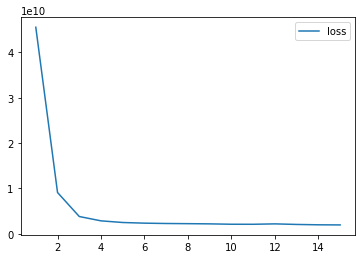

In [320]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

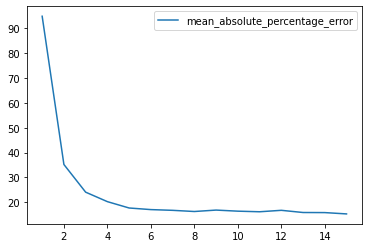

In [321]:
# Plot the accuracy
history_df.plot(y="mean_absolute_percentage_error")